In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, classification_report, roc_auc_score, roc_curve, r2_score
import statsmodels.api as sm
import math


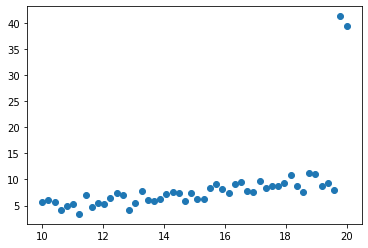

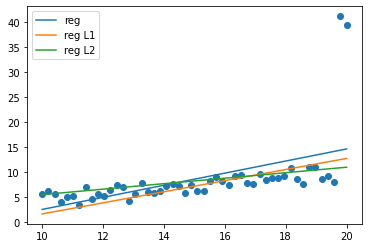

In [8]:


N = 50
X = np.linspace(0, 10, N) + 10
Y = 0.5*X + np.random.randn(N)
Y[-1] += 30
Y[-2] += 31

plt.scatter(X, Y)
plt.show()

def reg(X, Y, L1 = None, L2 = None, epochs = 1000, lr = 0.001):
    X = np.vstack([np.ones(N), X]).T
    w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
    if L1:
        Y_pred = X.dot(w)
        errors = Y_pred - Y
        w -= lr*(X.T.dot(errors) + L1*np.sign(w))
    if L2:
        w = np.linalg.solve(L2*np.eye(2) + X.T.dot(X), X.T.dot(Y))
    return w

plt.scatter(X, Y)
w = reg(X, Y)
Y_pred = np.vstack([np.ones(N), X]).T.dot(w)
plt.plot(X, Y_pred, label='reg')
w = reg(X, Y, L1 = 100)
Y_pred = np.vstack([np.ones(N), X]).T.dot(w)
plt.plot(X, Y_pred, label='reg L1')
w = reg(X, Y, L2 = 1000)
Y_pred = np.vstack([np.ones(N), X]).T.dot(w)
plt.plot(X, Y_pred, label='reg L2')
plt.legend()
plt.show()

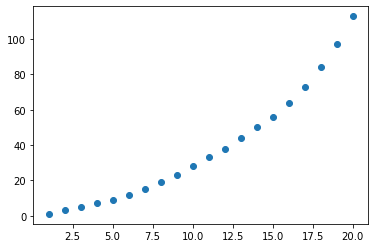

[0.80990257 0.27028849 0.23937687]


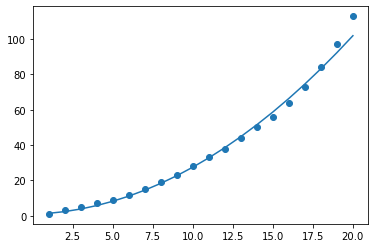

In [9]:
# Univariate Polynomial Regression
class PolynomailRegression() :
     
    def __init__( self, degree, learning_rate, iterations ) :
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
              
    def transform( self, X ) :
        X_transform = np.ones( ( self.m, 1 ) )
        j = 0
        for j in range( self.degree ) :
            if j != 0 :
                x_pow = np.power( X, j )
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
        return X_transform  
     
    def normalize( self, X ) :
        X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
        return X
         
    def fit( self, X, Y ) :
        self.X = X
        self.Y = Y
        self.m = self.X.shape[0]
        self.W = np.zeros( self.degree )
        X_transform = self.transform( self.X )
        X_normalize = self.normalize( X_transform )
        for i in range( self.iterations ) :
            h = self.predict( self.X )
            error = h - self.Y
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )
        return self.W
     
    def predict( self, X ) :
        X_transform = self.transform( X )
        X_normalize = self.normalize( X_transform )
        return np.dot( X_transform, self.W )

N = 20
X = np.arange(1, 21, 1)
Y = np.array([1, 3, 5, 7, 9, 12, 15, 19, 23, 28,
              33, 38, 44, 50, 56, 64, 73, 84, 97, 113])

plt.scatter(X, Y)
plt.show()

regressor = PolynomailRegression(degree = 1+2, learning_rate = 0.0001, iterations = 3000)
w = regressor.fit(X, np.log(Y))
f = np.vectorize(lambda x: w[0] + w[1]*x**1 + w[2]*x**2)
print(w)

plt.scatter(X, Y)
plt.plot(X, f(X), label='poly')
plt.show()

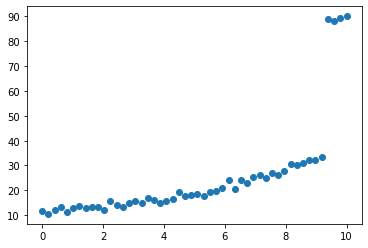

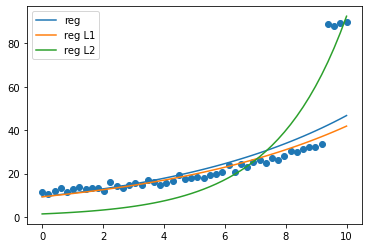

In [10]:
N = 50
X = np.linspace(0, 10, N)
Y = 0.9*X + np.exp(0.3*X) + np.random.randn(N) + 10
Y[-1] += 50
Y[-2] += 51
Y[-3] += 52
Y[-4] += 53

plt.scatter(X, Y)
plt.show()

plt.scatter(X, Y)
w = reg(X, np.log(Y))
f = np.vectorize(lambda x: np.exp(w[0]) * np.exp(w[1])**x)
Y_pred = f(X)
plt.plot(X, Y_pred, label='reg')
w = reg(X, np.log(Y), L1 = 10)
f = np.vectorize(lambda x: np.exp(w[0]) * np.exp(w[1])**x)
Y_pred = f(X)
plt.plot(X, Y_pred, label='reg L1')
w = reg(X, np.log(Y), L2 = 100)
f = np.vectorize(lambda x: np.exp(w[0]) * np.exp(w[1])**x)
Y_pred = f(X)
plt.plot(X, Y_pred, label='reg L2')
plt.legend()
plt.show()